# Introduction

Within this project, the goal is to analyze data from the National Parks Service regarding different species of animals and plants observed throughout different national park locations. 

This project will be working with (2) different data sets to analyze and prepare data, plot charts, and review findings from the analysis. 

Below are a list of questions that I will seek to answer within this project:
+ What is the distribution of conservation status for animals?
+ Are certain types of species more likely to need conservation?
+ Are the differences between species and their conservation status significant?
+ Which species were spotted the most at each park?

### Data Sources

The following (2) data sets are being provided by [CodeCademy](https://www.codecademy.com):
+ `observations.csv`
+ `species_info.csv`

Note: The data for this project is inspired by real data, but is mostly fictional.

### Goals

With the provided data, the main goals of the project will be to better understand characteristics of the different species and their conservation status, along with their relationships to the different national parks. As stated above, through the analysis of the provided data sets, I will seek to answer the following questions:
+ What is the distribution of conservation status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ Which species were spotted the most at each park?

# Getting Started

First, it will be necessary to import the primary modules that will be used within this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Data

In order to better analyze the data, the (2) provided data sets will be loaded into (2) new `DataFrames`:
+ `observations`
+ `species`

Thereafter, `.head()` will be called on the `DataFrame` to display the first (5) rows. 

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Exploring the DataFrames

Within `observations` there are (3) columns and they are described below:
+ **scientific_name** - the scientific name of each species
+ **park_name** - park where species were found
+ **observations** - the number of times each species was observed at park

Within `species` there are (4) columns, and they are described below:
+ **category** - class of animal
+ **scientific_name** - the scientific name of each species
+ **common_name** - the common names of each species
+ **conservation_status** - each species’ current conservation status

Below I will explore further dimensions of the data sets. 

In [5]:
print(f"observations shape: {observations.shape}")
print(f"species shape: {species.shape}")

observations shape: (23296, 3)
species shape: (5824, 4)


#### Observations

Using the `observations` data set, I will first want to explore the total number of national parks, names of the national parks, the `sum` of the `observations`, and the count of unique `scientific_name` observed at the park. 

There are a total of (4) national parks within the data set, each listed below:
+ Great Smoky Mountains National Park
+ Yosemite National Park
+ Bryce National Park
+ Yellowstone National Park

Throughout the (4) national parks, there were a total of 3,314,739 observations of 5,541 unique species observed within a 7 day period! Yellowstone National Park appears to have the most observations with 1,443,562 observations throughout the 7 day period. 

In [6]:
print(f"Total number of national parks: {observations.park_name.nunique()}")
print(f"National Park Names: {observations.park_name.unique()}")

Total number of national parks: 4
National Park Names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
print(f"Total number of observations: {observations.observations.sum()}")

Total number of observations: 3314739


In [8]:
print(f"Unique scientific names: {observations.scientific_name.nunique()}")

Unique scientific names: 5541


In [9]:
park_observations = observations.groupby("park_name").sum("observations").reset_index()
park_observations.columns = ["National Parks", "Observations"]
park_observations.Observations = pd.to_numeric(park_observations.Observations)
park_observations

,National Parks,Observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


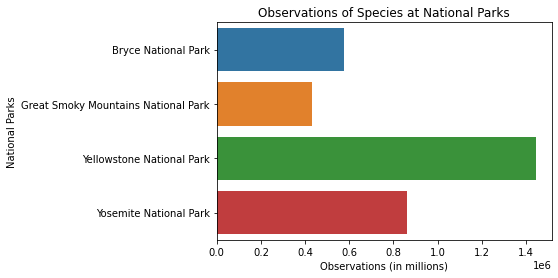

In [10]:
sns.barplot(data = park_observations, x = "Observations", y = "National Parks")
plt.title("Observations of Species at National Parks")
plt.xlabel("Observations (in millions)");

#### Species

Using the `species` data set, I will first explore the unique categories of `species` within the data set, and the total count of `species` within each `category`.

The (7) unique categories of species are listed below:
+ Mammal
+ Bird
+ Reptile
+ Amphibian
+ Fish
+ Vascular Plant
+ Nonvascular Plant

`Vascular Plant` appears to have the largest share of the species at 4,470, and `Amphibian` and `Reptile` are coming in with the lowest share at 80 and 79 respectively. 

In [11]:
print(f"Total number of categories: {species.category.nunique()}")
print(f"Unique categories: {species.category.unique()}")

Total number of categories: 7
Unique categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [12]:
category_size = species.groupby("category").size().sort_values(ascending = False).reset_index()
category_size.columns = ["Category", "Count"]
category_size

,Category,Count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


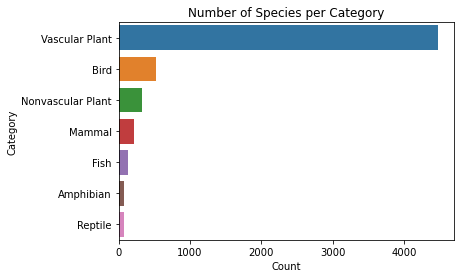

In [13]:
sns.barplot(data = category_size, x = "Count", y = "Category")
plt.title("Number of Species per Category");

Next, I want to explore the `conservation_status` column to find out how many different values there are, the names, and the total count of species observed per value.

In [14]:
print(f"Number of conservation statuses: {species.conservation_status.nunique()}")
print(f"Unique conservation statuses: {species.conservation_status.unique()}")

Number of conservation statuses: 4
Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


There are a total of (4) unique conservation statuses:
+ `Species of Concern`: declining or appear to be in need of conservation
+ `Threatened`: vulnerable to endangerment in the near future
+ `Endangered`: seriously at risk of extinction
+ `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

There also appears to be a number of species with `nan` values. In this case, the `nan` values tell me that these species are not under any conservation status, and they do not require any intervention. To eliminate the `nan` values, I will convert the status to `No Intervention`, thereafter, I will get a count of species listed under each unique `conservation_status`.

It is good to see that a majority of the species do not carry a conservation status, whereas (16) are `Endangered`, (4) are `In Recovery`, (161) are `Species of Concern`, and (10) are `Threatened`. 

In [15]:
species.fillna("No Intervention", inplace = True)
species.groupby("conservation_status").size().sort_values(ascending = False)

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

Lastly, I will get the total unique `scientific_name` value to see if it matches correctly with the `observation` data set. 

In [16]:
print(f"Number of unique species: {species.scientific_name.nunique()}")

Number of unique species: 5541


### Analysis of Endangerment

After reviewing a few elements of the data sets, I will now do further work in regards to understanding `conservation_status` per `category` of `species`. 

Of the 16 `species` that are `Endangered`, (7) are `Mammal`, (4) `Bird`, (3) `Fish`, and `Amphibian` and `Vascular Plant` each have (1). `Mammal` makes up the fourth largest `category` of `species`, so it appears that `Mammal` is the `species` that is most likely to be endangered throughout the national parks. There is a large number of `Bird` `species` that fall under `Species of Concern`, however, `Bird` is also the second largest category of `species`, coming in at (521). 

In [17]:
conservation_cat = species[species.conservation_status != "No Intervention"]\
        .groupby(["conservation_status", "category"])["scientific_name"].count().unstack()
conservation_cat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


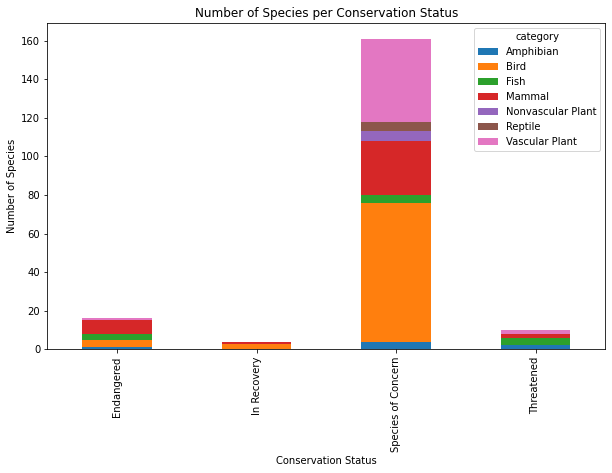

In [18]:
ax = conservation_cat.plot(kind = "bar", stacked = True, figsize = (10,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.title("Number of Species per Conservation Status");

### Significance of Conservation Statuses

Next, I will be exploring whether certain types of `species` more likely to need conservation, and whether the differences between `species` and their `conservation_status` is significant.

First, to address whether certaim types of `species` are more likely to need conservation, I will be creating a new column in `species` called `is_protected` that will consist of a count of species that had any value other than `No Intervention` in `conservation_status`. 

In [19]:
species["is_protected"] = species.conservation_status != "No Intervention"
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


For this new column, `False` means the species does not carry any type of `conservation_status`, and `True` means that they do carry some type of `conservation_status`. I will need to get a count by `scientific_name` and `groupby` `category` to fully understand how many are, and are not, protected. I will create a new table called `protected_count`. 

In [20]:
protected_count = species.groupby(["category", "is_protected"]).scientific_name.nunique()\
        .reset_index().pivot(columns = "is_protected", index = "category", values = "scientific_name")\
        .reset_index()

protected_count.columns = ["category", "not_protected", "protected"]

protected_count

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


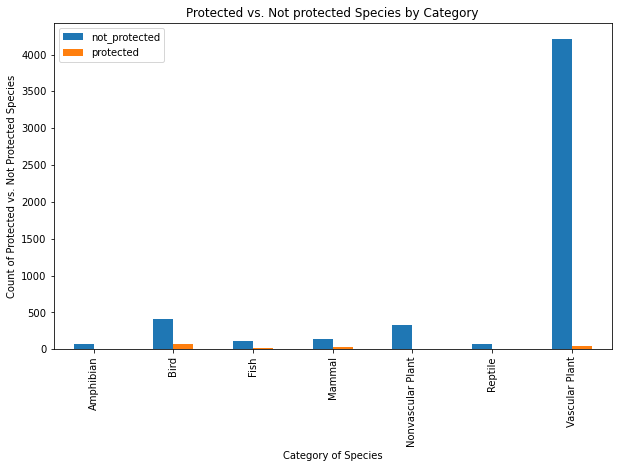

In [21]:
ax = protected_count.plot(kind = "bar", stacked = False, figsize = (10,6))
ax.set_xticks(range(len(protected_count.category)))
ax.set_xticklabels(protected_count.category)
ax.set_xlabel("Category of Species")
ax.set_ylabel("Count of Protected vs. Not Protected Species")
plt.title("Protected vs. Not protected Species by Category");

To get a better perspective of how many `species` do carry a `conservation_status`, I will break it down by percentage, and save the percentages to a new column in `protected_count` called `percent_protected`.

In [22]:
protected_count["percent_protected"] = round(protected_count.protected / \
        (protected_count.protected + protected_count.not_protected) * 100, 2)

protected_count

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


In confirmation of what was stated above, roughly 17% of mammals carry some type of conservation status, and they make up the fourth largest `category` of `species`. `Bird` makes up the second largest `category` of `species`, and roughly 15% of them carry a `conservation_status`. 

#### Statistical Significance

To determine whether the differences between `species` and their `conservation_status` is significant, I will run some Chi-Squared tests. A Chi-Square test is a test for independence between caregorical variables. In running a Chi-Square test, a contingency table is necessary. This is used in statistics to summarise the relationship between several categorical variables, and looks like this: 

||not protected|protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The aim of the test is to conclude whether the two variables are related to each other. The first test will be ran using `Mammal` and `Bird` values, and called `contingency1`. In running the Chi-Square test, I will be using an alpha value of 0.05, and if the p-value of the test comes out greater than the alpha value, the **Null Hypothesis**  below holds true. If the p-value of the test comes out lower than the alpha value, then the **Null Hypothesis** is rejected, and it is likely that the **Alternative Hypothesis** is more consistent with our observations.  

**Null Hypothesis:** There is no relation between `species` and their `conservation_status`.

**Alternate Hypothesis:** There is a significant relation between `species` and their `conservation_status`. 

In [23]:
from scipy.stats import chi2_contingency

contingency1 = [[146, 30],
                [413, 75]]

alpha = 0.05

stat, p, dof, expected = chi2_contingency(contingency1)

print("p-value is: " + str(p))
if p <= alpha:
    print("Dependent (reject null hypothesis)")
else:
    print("Independent (null hypothesis holds true)")

p-value is: 0.6875948096661336
Independent (null hypothesis holds true)


After running the test on `contingency1`, our p-value of 0.69 is significantly greater than our alpha value, indicating that the variables are independent of one another, and our **Null Hypothesis** holds true. 

I will now run another test called `contingency2`, and will be using the values of `Mammal` and `Reptile`. 

||not protected|protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

In [25]:
contingency2 = [[146, 30],
                [73, 5]]

alpha = 0.05

stat, p, dof, expected = chi2_contingency(contingency2)

print("p-value is: " + str(p))
if p <= alpha:
    print("Dependent (reject null hypothesis)")
else:
    print("Independent (null hypothesis holds true)")

p-value is: 0.03835559022969898
Dependent (reject null hypothesis)


The Chi-Square test ran on `contingency2` returns a p=value of 0.038, which is lower than the alpha value used. This allows us to reject the **Null Hypothesis**, and conclude that the **Alternative Hypothesis** is more consistent with our observations. In turn, mammals statistically have a highter rate of needed protection when compared with reptiles, but not when compared with birds. 

#### Count of Species per Park

The last step in the analysis will be uncovering which `category` of `species` was spotted the most at each park. 

First, in review of the `species` data set, there are a total (5,824) rows, but only (5,541) unique scientific names of `species` in the data set. I'm going to be using `.drop_duplicates()` and specifying `scientific_name` as the `subset` to remove any duplicated rows, and I will be saving this to `sciname_cat`. This is to ensure the number of unique scientific names match for both data sets. Thereafter, I will be dropping (3) columns that I will not be using for this portion of the analysis. 

In [26]:
sciname_cat = species.drop_duplicates(subset = ["scientific_name"])
sciname_cat = sciname_cat.drop(["common_names", "conservation_status", "is_protected"], axis = 1)

print(sciname_cat.info())
print(sciname_cat.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         5541 non-null   object
 1   scientific_name  5541 non-null   object
dtypes: object(2)
memory usage: 129.9+ KB
None
  category                scientific_name
0   Mammal  Clethrionomys gapperi gapperi
1   Mammal                      Bos bison
2   Mammal                     Bos taurus
3   Mammal                     Ovis aries
4   Mammal                 Cervus elaphus


Next, I will be merging the `observations` data set with `sciname_cat`, and saving it to a new data frame called `cat_sciname_obs`. To ensure I have not lost any data in the process, I will get the `.sum()` of the `observations` column to verify it matches the total number of `observations` in the original `observations` data set. 

In [27]:
cat_sciname_obs = observations.merge(sciname_cat)

print(cat_sciname_obs.info())
print(cat_sciname_obs.observations.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
 3   category         23296 non-null  object
dtypes: int64(1), object(3)
memory usage: 910.0+ KB
None
3314739


To clean up the data a bit further, I will be creating a new data frame called `count_per_park`, in which I will be gathering the `.sum()` of `ovservations` of each `species` `category`, and grouping them together by `park_name`. 

In [28]:
count_per_park = cat_sciname_obs.groupby(["park_name", "category"]).sum("observations").reset_index()

count_per_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7380
1,Bryce National Park,Bird,51647
2,Bryce National Park,Fish,12423
3,Bryce National Park,Mammal,20550
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,7950
6,Bryce National Park,Vascular Plant,443083
7,Great Smoky Mountains National Park,Amphibian,5707
8,Great Smoky Mountains National Park,Bird,37728
9,Great Smoky Mountains National Park,Fish,9206


Next, I will be using `.pivot()` to clean up the data a little further and organize it in a clearer way. 

In [29]:
count_per_park = count_per_park.pivot(columns = "category", index = "park_name", values = "observations").reset_index()

count_per_park.columns = ["Park Name", "Amphibian", "Bird", "Fish", "Mammal", "Nonvascular Plant", "Reptile", "Vascular Plant"]

count_per_park

,Park Name,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Bryce National Park,7380,51647,12423,20550,32992,7950,443083
1,Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333619
2,Yellowstone National Park,19440,127251,30574,50795,83021,19554,1112927
3,Yosemite National Park,11444,76207,18615,30339,49783,11483,665461


It is very clear from the table above, and the bar chart below that the `species` that was spotted the most at each national park was `Vascular Plant`. I will be creating another table further below, but removing `Vascular Plant` from the data to get a better view of how the other `category` of `species` compare to one another. 

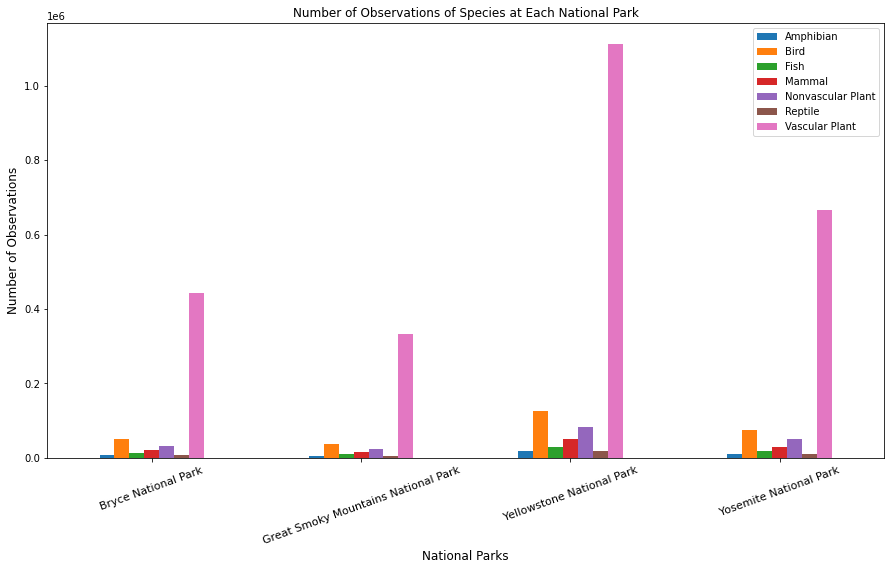

In [30]:
ax = count_per_park.plot(kind = "bar", figsize = (15, 8), stacked = False)
ax.set_xticks(range(len(count_per_park["Park Name"])))
ax.set_xticklabels(count_per_park["Park Name"], fontsize = 11, rotation = 20)
ax.set_xlabel("National Parks", fontsize = 12)
ax.set_ylabel("Number of Observations", fontsize = 12)
plt.title("Number of Observations of Species at Each National Park");

In [31]:
count_per_park = count_per_park.drop("Vascular Plant", axis = 1)

The `Bird` `category` is the next `species` that was spotted the most at each national park, followed then by `Nonvascular Plant`. `Yellow Stone` appears to have the most `observations` of each `species` when compared to the other national parks. 

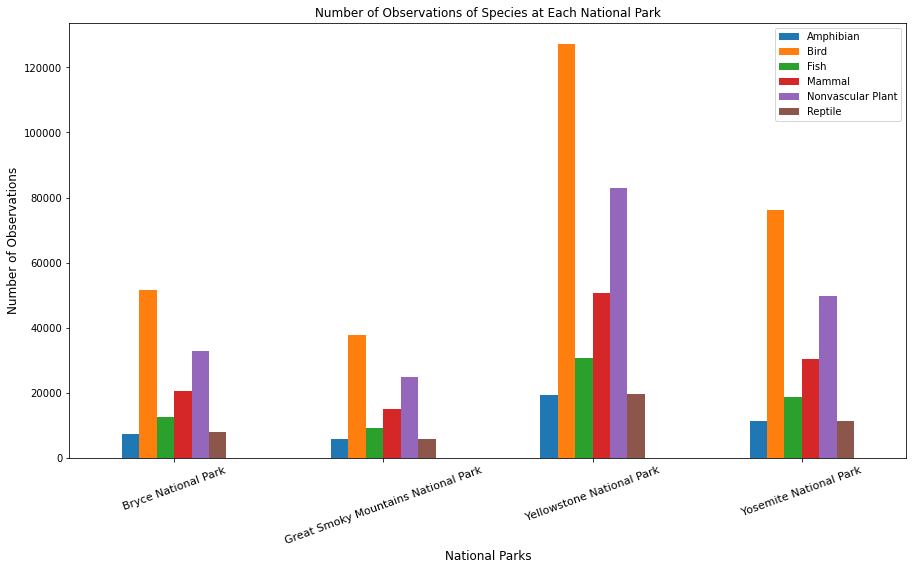

In [32]:
ax = count_per_park.plot(kind = "bar", figsize = (15, 8), stacked = False)
ax.set_xticks(range(len(count_per_park["Park Name"])))
ax.set_xticklabels(count_per_park["Park Name"], fontsize = 11, rotation = 20)
ax.set_xlabel("National Parks", fontsize = 12)
ax.set_ylabel("Number of Observations", fontsize = 12)
plt.title("Number of Observations of Species at Each National Park");

# Conclusion

Through the analysis of this project, many data visualizations were able to be made, as well as the ability to get a better understanding of the conservation status for the many different species within the data sets. The goal of the project was to also provide answers to the following questions:

+ What is the distribution of conservation status for animals?
    + The total nmumber of species that held some type of conservation status was (191), compared to the majority of species that did not hold any type of conservation status (5,633). Birds, vascular plants, and mammals were the (3) most common category of species that carried some type of conservation status. 
    
    
+ Are certain types of species more likely to need conservation?
    + Once I broke down the count per species that carried some type of conservation status vs. those that did not, I was able to then calculate it by percentages. Mammals (17.05%) and birds (15.37%) carried the highest percentages of the species that received protection through conservation.  
    
    
+ Are the differences between species and their conservation status significant?
    + Two Chi-Squared tests were ran to determine whether the conservation status was significant between species, and the results returned that mammals and birds did not have a signicant difference in conservation percentage, whereas, mammals and reptiles did exhibit a statistical conservation status significance. 
    
    
+ Which species were spotted the most at each park?
    + When grouped by category and park name, the species that was spotted the most at each national park was the vascular plant, followed by birds, and nonvascular plants. The park that provided the most observations was Yellowstone National Park. 